In [31]:
# Import training_test data (Site 1)
from google.colab import files
uploaded = files.upload()

Saving LIDAR_30m_cubic_pts_clean_parameters_egm08_clean_t61_C.csv to LIDAR_30m_cubic_pts_clean_parameters_egm08_clean_t61_C (1).csv


In [32]:
# Install packages

!pip install xgboost
!pip install catboost
!pip install lightgbm
!pip install -U scikit-learn
!pip install bayesian-optimization
!pip install pdpbox
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached PDPbox-0.2.1.tar.gz (34.0 MB)
  Preparing metadata (setup.py) ... done
  Using cached matplotlib-3.1.1.tar.gz (37.8 MB)
  Preparing metadata (setup.py) ... done
  Using cached sklearn-0.0.post4.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=cd0a211336b230fdfe93e6e62efbb938d6f63bd0765e3d4fb520

In [33]:
!pip install pdpbox --upgrade
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 51.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.7.1 which is incompatible.


In [34]:
# Import libraries

import math
from scipy.stats import uniform
import time #2
import pandas  as pd
import numpy   as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from pandas import read_csv
from matplotlib import pyplot
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance

# Import accuracy metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#from pdpbox import pdp, get_dataset, info_plots 
#import sklearn.ensemble
#from sklearn.ensemble import partial_dependence, plot_partial_depen
import pickle
from matplotlib import pyplot as plt
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
import seaborn as sns # for correlation heatmap
import joblib

In [35]:
# read data (site 1)
data = pd.read_csv("LIDAR_30m_cubic_pts_clean_parameters_egm08_clean_t61_C.csv")
data = data.reset_index()
X,y = data.iloc[:,7:18], data.iloc[:,6] 

#data.head()
#data.columns
y


0        -5.822998
1        -0.716003
2         2.267998
3        -0.049927
4        -0.288025
           ...    
23023    65.752991
23024   -14.109009
23025    -3.921021
23026    77.560974
23027   -26.373047
Name: Elevation Diff, ∆h (m), Length: 23028, dtype: float64

**CATBOOST EVALUATION - INITIAL - IGARSS 2023** 

In [36]:
# define training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

In [37]:
# CatBoost regressor

cat_model = CatBoostRegressor()

In [38]:
# CatBoost fit

start_time = time.time()
cat_model.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))



Learning rate set to 0.064879
0:	learn: 17.0081121	total: 24.3ms	remaining: 24.3s
1:	learn: 16.8351484	total: 51.7ms	remaining: 25.8s
2:	learn: 16.6560424	total: 83.5ms	remaining: 27.7s
3:	learn: 16.5088637	total: 90.7ms	remaining: 22.6s
4:	learn: 16.3703556	total: 96.2ms	remaining: 19.1s
5:	learn: 16.2480534	total: 108ms	remaining: 17.9s
6:	learn: 16.1443230	total: 122ms	remaining: 17.3s
7:	learn: 16.0464892	total: 147ms	remaining: 18.2s
8:	learn: 15.9535721	total: 166ms	remaining: 18.2s
9:	learn: 15.8656640	total: 190ms	remaining: 18.8s
10:	learn: 15.7645785	total: 205ms	remaining: 18.4s
11:	learn: 15.6855481	total: 218ms	remaining: 17.9s
12:	learn: 15.6128470	total: 234ms	remaining: 17.8s
13:	learn: 15.5285719	total: 248ms	remaining: 17.5s
14:	learn: 15.4329526	total: 263ms	remaining: 17.3s
15:	learn: 15.3832996	total: 287ms	remaining: 17.7s
16:	learn: 15.3281843	total: 315ms	remaining: 18.2s
17:	learn: 15.2557839	total: 323ms	remaining: 17.6s
18:	learn: 15.1950977	total: 329ms	rema

In [39]:
# CatBoost pred
start_time = time.time()
y_pred = cat_model.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))


--- 0.028722524642944336 seconds ---


In [40]:
# Error metrics
mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred) #robust to outliers
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
maxe = max_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

In [41]:
# Print Error Metrics
print("\n")
print("regression error metrics")
print("mae:")
print(mae)
print("mdae:")
print(mdae)
print("mse:")
print(mse)
print("rmse:")
print(rmse)
print("maxe:")
print(maxe)
print("mape:")
print(mape)
print("R2:")
print(R2)



regression error metrics
mae:
5.185295003425155
mdae:
1.549247250430072
mse:
146.4249351608289
rmse:
12.10061713966808
maxe:
171.31795443762826
mape:
350696525214.9699
R2:
0.507137299254103


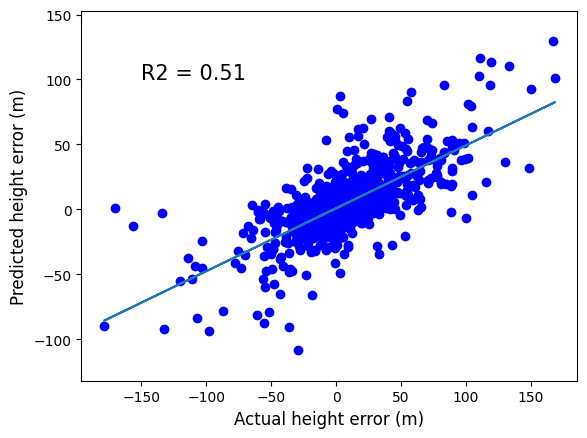

In [42]:
# PLOT Y_TEST AND Y_PRED
plt.scatter(y_test, y_pred, c='blue')
plt.xlabel('Actual height error (m)', fontsize=12)
plt.ylabel('Predicted height error (m)', fontsize=12)
plt.axis('equal')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test, y_pred, 1)
#add linear regression line to scatterplot 
plt.plot(y_test, m*y_test+b)
plt.annotate("R2 = {:.2f}".format(r2_score(y_test, y_pred)), (-150, 100), fontsize=15)
plt.show()

In [43]:
cat_model.get_feature_importance(type= "FeatureImportance")

array([1.62146241e+01, 5.83941377e+00, 1.24054108e+01, 1.49691345e+01,
       5.59625661e+00, 6.46003173e+00, 1.45258621e+01, 4.45045479e+00,
       6.23080585e-03, 1.15839122e+01, 7.94866860e+00])

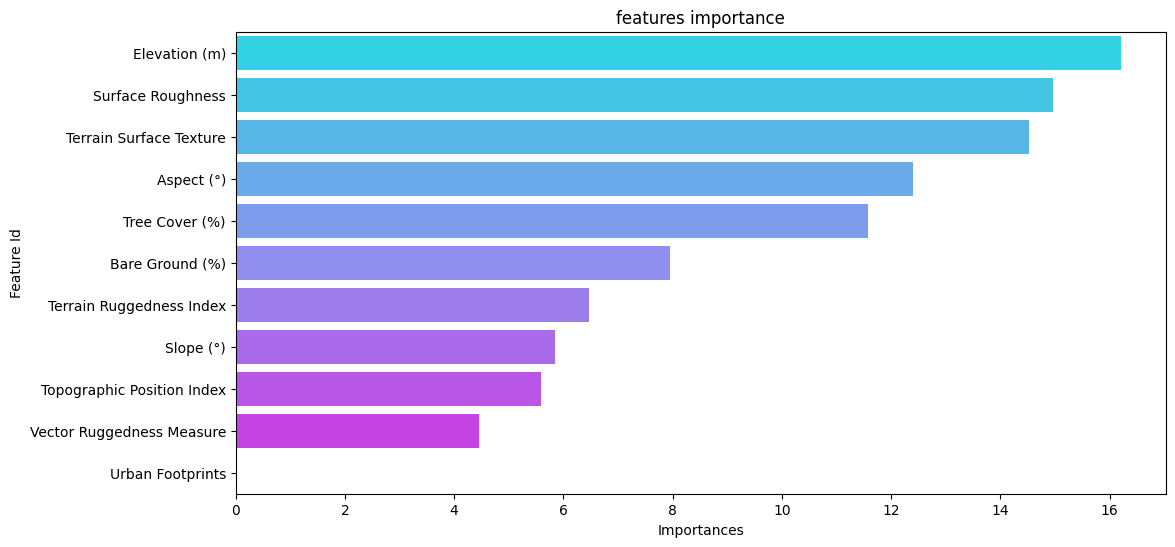

In [44]:
# Feature importance plot source -  https://www.analyticsvidhya.com/blog/2021/04/how-to-use-catboost-for-mental-fatigue-score-prediction/
import catboost
# Create a dataframe of feature importance 
df_feature_importance = pd.DataFrame(cat_model.get_feature_importance(prettified=True))
#plotting feature importance
plt.figure(figsize=(12, 6));
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool");
plt.title('features importance');


In [45]:
features = ['Elevation (m)',
            'Slope (°)',
            'Aspect (°)',
            'Surface Roughness',
            'Topographic Position Index',
            'Terrain Ruggedness Index',
            'Terrain Surface Texture',
            'Vector Ruggedness Measure',
            'Urban Footprints',
            'Tree Cover (%)',
            'Bare Ground (%)']

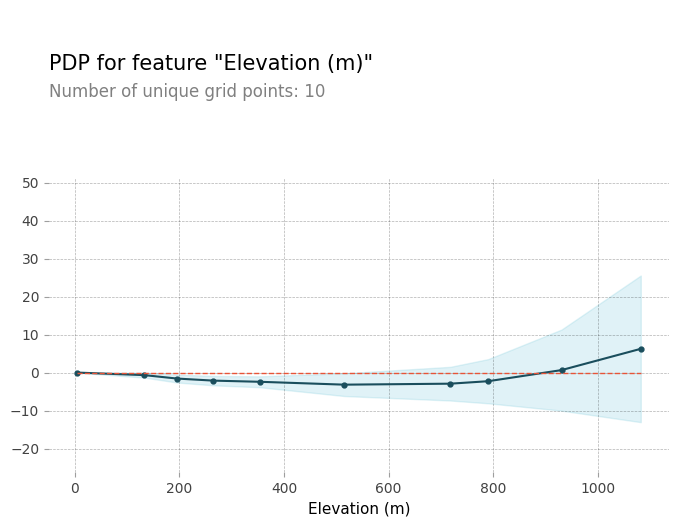

In [46]:
#pdplots shows the marginal effect a feature has on the predicted outcome of a model
#show whether the r/ship btw the target and a feature is linear or complex
#show the influence of the input variables on the predicted height error

from pdpbox import pdp
pdp_elevation = pdp.pdp_isolate(model=cat_model,                  
                                dataset=data,                              
                                model_features=['Elevation (m)',
                                                'Slope (°)',
                                                'Aspect (°)',
                                                'Surface Roughness',
                                                'Topographic Position Index',
                                                'Terrain Ruggedness Index',
                                                'Terrain Surface Texture',
                                                'Vector Ruggedness Measure',
                                                'Urban Footprints',
                                                'Tree Cover (%)',
                                                'Bare Ground (%)'],
                                feature='Elevation (m)')

#basic aesthetics
plot_params = {
    'title_fontsize': 15,
    'subtitle_fontsize': 12,
    'contour_color':  'white',
    'cmap': 'viridis',
    'inter_fill_alpha': 0.8,
    'inter_fontsize': 9}

fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_elevation,
                        feature_name='Elevation (m)', 
                        center=True, 
                        x_quantile=False, 
                        ncols=2,
                        plot_lines=False, 
                        frac_to_plot=100,
                        plot_params=plot_params, 
                        figsize=(8, 6))

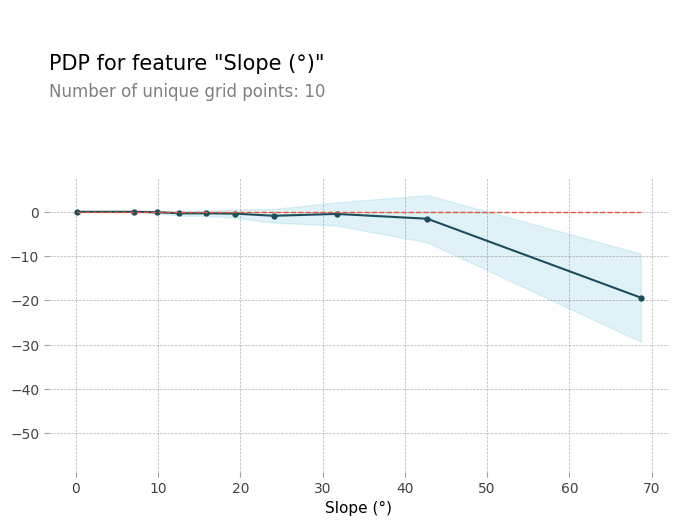

In [47]:
#pdplots shows the marginal effect a feature has on the predicted outcome of a model
#show whether the r/ship btw the target and a feature is linear or complex
#show the influence of the input variables on the predicted height error. 
from pdpbox import pdp
pdp_elevation = pdp.pdp_isolate(model=cat_model,                  
                          dataset=data,                              
                          model_features=['Elevation (m)',
                                          'Slope (°)',
                                          'Aspect (°)',
                                          'Surface Roughness',
                                          'Topographic Position Index',
                                          'Terrain Ruggedness Index',
                                          'Terrain Surface Texture',
                                          'Vector Ruggedness Measure',
                                          'Urban Footprints',
                                          'Tree Cover (%)',
                                          'Bare Ground (%)'],
                          feature='Slope (°)')

#basic aesthetics
plot_params = {
    'title_fontsize': 15,
    'subtitle_fontsize': 12,
    'contour_color':  'white',
    'cmap': 'viridis',
    'inter_fill_alpha': 0.8,
    'inter_fontsize': 9}

fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_elevation,
                        feature_name='Slope (°)', 
                        center=True, 
                        x_quantile=False, 
                        ncols=2,
                        plot_lines=False, 
                        frac_to_plot=100,
                        plot_params=plot_params, 
                        figsize=(8, 6))

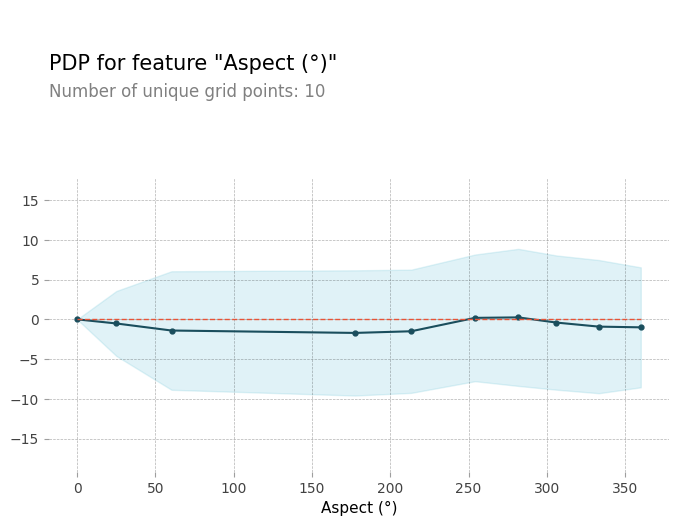

In [48]:
from pdpbox import pdp
pdp_elevation = pdp.pdp_isolate(model=cat_model,                  
                          dataset=data,                              
                          model_features=['Elevation (m)',
                                          'Slope (°)',
                                          'Aspect (°)',
                                          'Surface Roughness',
                                          'Topographic Position Index',
                                          'Terrain Ruggedness Index',
                                          'Terrain Surface Texture',
                                          'Vector Ruggedness Measure',
                                          'Urban Footprints',
                                          'Tree Cover (%)',
                                          'Bare Ground (%)'],
                          feature='Aspect (°)')

#basic aesthetics
plot_params = {
    'title_fontsize': 15,
    'subtitle_fontsize': 12,
    'contour_color':  'white',
    'cmap': 'viridis',
    'inter_fill_alpha': 0.8,
    'inter_fontsize': 9}

fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_elevation,
                        feature_name='Aspect (°)', 
                        center=True, 
                        x_quantile=False, 
                        ncols=2,
                        plot_lines=False, 
                        frac_to_plot=100,
                        plot_params=plot_params, 
                        figsize=(8, 6))

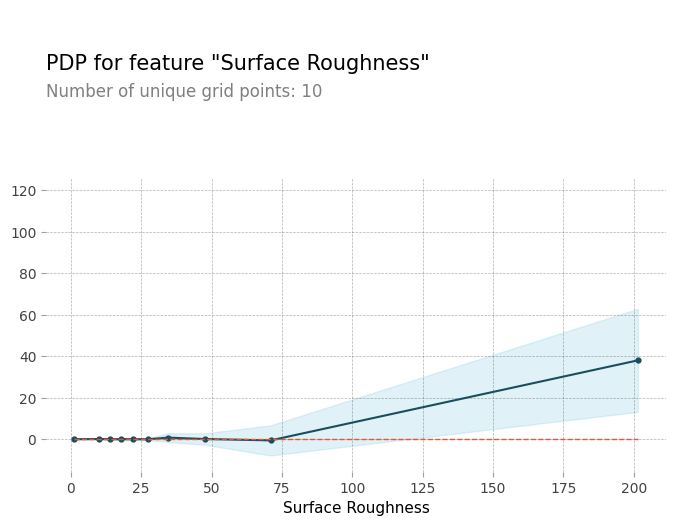

In [49]:
from pdpbox import pdp
pdp_elevation = pdp.pdp_isolate(model=cat_model,                  
                          dataset=data,                              
                          model_features=['Elevation (m)',
                                          'Slope (°)',
                                          'Aspect (°)',
                                          'Surface Roughness',
                                          'Topographic Position Index',
                                          'Terrain Ruggedness Index',
                                          'Terrain Surface Texture',
                                          'Vector Ruggedness Measure',
                                          'Urban Footprints',
                                          'Tree Cover (%)',
                                          'Bare Ground (%)'],
                          feature='Surface Roughness')

#basic aesthetics
plot_params = {
    'title_fontsize': 15,
    'subtitle_fontsize': 12,
    'contour_color':  'white',
    'cmap': 'viridis',
    'inter_fill_alpha': 0.8,
    'inter_fontsize': 9}

fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_elevation,
                        feature_name='Surface Roughness', 
                        center=True, 
                        x_quantile=False, 
                        ncols=2,
                        plot_lines=False, 
                        frac_to_plot=100,
                        plot_params=plot_params, 
                        figsize=(8, 6))

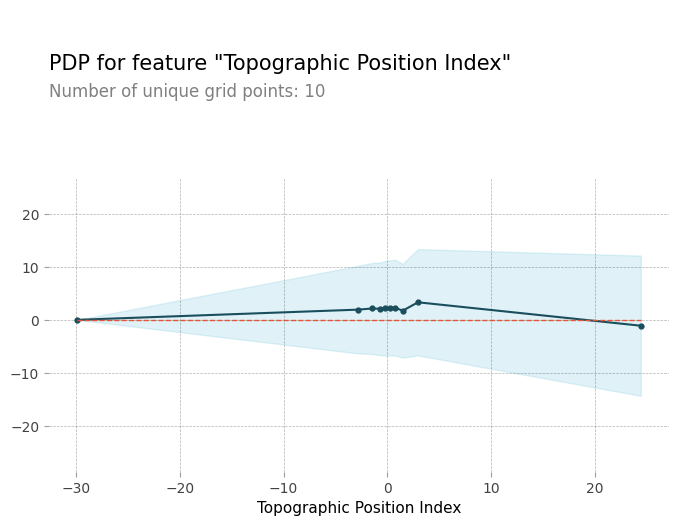

In [50]:
from pdpbox import pdp
pdp_elevation = pdp.pdp_isolate(model=cat_model,                  
                          dataset=data,                              
                          model_features=['Elevation (m)',
                                          'Slope (°)',
                                          'Aspect (°)',
                                          'Surface Roughness',
                                          'Topographic Position Index',
                                          'Terrain Ruggedness Index',
                                          'Terrain Surface Texture',
                                          'Vector Ruggedness Measure',
                                          'Urban Footprints',
                                          'Tree Cover (%)',
                                          'Bare Ground (%)'],
                          feature='Topographic Position Index')

#basic aesthetics
plot_params = {
    'title_fontsize': 15,
    'subtitle_fontsize': 12,
    'contour_color':  'white',
    'cmap': 'viridis',
    'inter_fill_alpha': 0.8,
    'inter_fontsize': 9}

fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_elevation,
                        feature_name='Topographic Position Index', 
                        center=True, 
                        x_quantile=False, 
                        ncols=2,
                        plot_lines=False, 
                        frac_to_plot=100,
                        plot_params=plot_params, 
                        figsize=(8, 6))

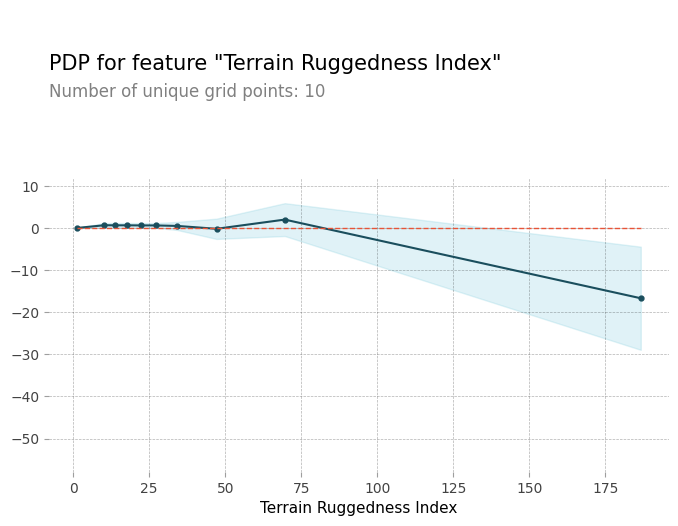

In [51]:
from pdpbox import pdp
pdp_elevation = pdp.pdp_isolate(model=cat_model,                  
                          dataset=data,                              
                          model_features=['Elevation (m)',
                                          'Slope (°)',
                                          'Aspect (°)',
                                          'Surface Roughness',
                                          'Topographic Position Index',
                                          'Terrain Ruggedness Index',
                                          'Terrain Surface Texture',
                                          'Vector Ruggedness Measure',
                                          'Urban Footprints',
                                          'Tree Cover (%)',
                                          'Bare Ground (%)'],
                          feature='Terrain Ruggedness Index')

#basic aesthetics
plot_params = {
    'title_fontsize': 15,
    'subtitle_fontsize': 12,
    'contour_color':  'white',
    'cmap': 'viridis',
    'inter_fill_alpha': 0.8,
    'inter_fontsize': 9}

fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_elevation,
                        feature_name='Terrain Ruggedness Index', 
                        center=True, 
                        x_quantile=False, 
                        ncols=2,
                        plot_lines=False, 
                        frac_to_plot=100,
                        plot_params=plot_params, 
                        figsize=(8, 6))

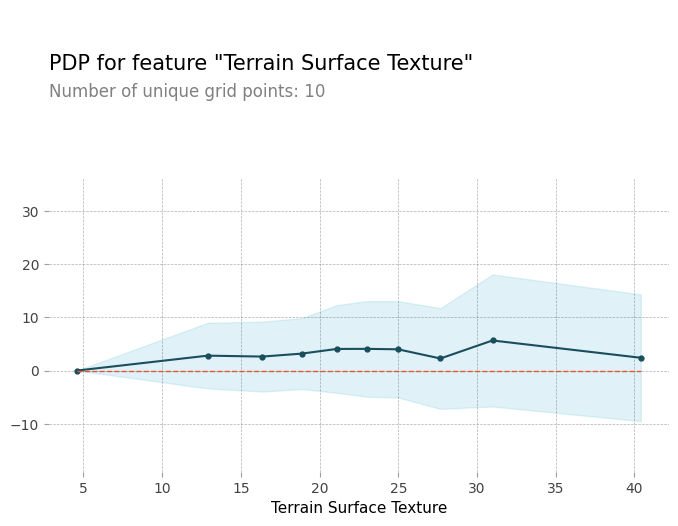

In [52]:
from pdpbox import pdp
pdp_elevation = pdp.pdp_isolate(model=cat_model,                  
                          dataset=data,                              
                          model_features=['Elevation (m)',
                                          'Slope (°)',
                                          'Aspect (°)',
                                          'Surface Roughness',
                                          'Topographic Position Index',
                                          'Terrain Ruggedness Index',
                                          'Terrain Surface Texture',
                                          'Vector Ruggedness Measure',
                                          'Urban Footprints',
                                          'Tree Cover (%)',
                                          'Bare Ground (%)'],
                          feature='Terrain Surface Texture')

#basic aesthetics
plot_params = {
    'title_fontsize': 15,
    'subtitle_fontsize': 12,
    'contour_color':  'white',
    'cmap': 'viridis',
    'inter_fill_alpha': 0.8,
    'inter_fontsize': 9}

fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_elevation,
                        feature_name='Terrain Surface Texture', 
                        center=True, 
                        x_quantile=False, 
                        ncols=2,
                        plot_lines=False, 
                        frac_to_plot=100,
                        plot_params=plot_params, 
                        figsize=(8, 6))

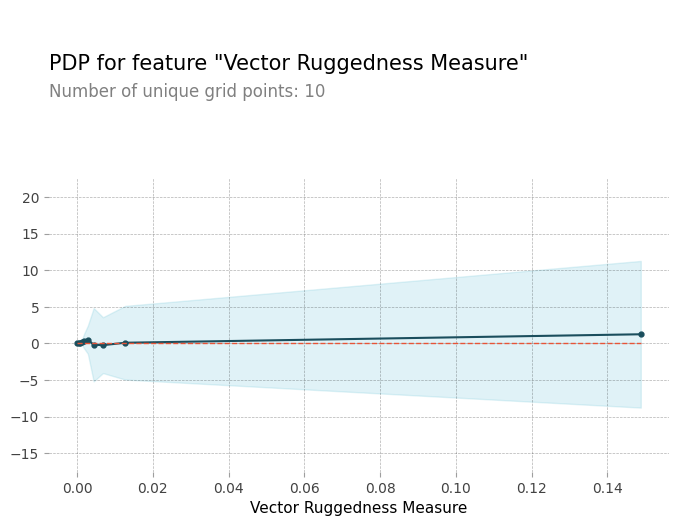

In [53]:
from pdpbox import pdp
pdp_elevation = pdp.pdp_isolate(model=cat_model,                  
                          dataset=data,                              
                          model_features=['Elevation (m)',
                                          'Slope (°)',
                                          'Aspect (°)',
                                          'Surface Roughness',
                                          'Topographic Position Index',
                                          'Terrain Ruggedness Index',
                                          'Terrain Surface Texture',
                                          'Vector Ruggedness Measure',
                                          'Urban Footprints',
                                          'Tree Cover (%)',
                                          'Bare Ground (%)'],
                          feature='Vector Ruggedness Measure')

#basic aesthetics
plot_params = {
    'title_fontsize': 15,
    'subtitle_fontsize': 12,
    'contour_color':  'white',
    'cmap': 'viridis',
    'inter_fill_alpha': 0.8,
    'inter_fontsize': 9}

fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_elevation,
                        feature_name='Vector Ruggedness Measure', 
                        center=True, 
                        x_quantile=False, 
                        ncols=2,
                        plot_lines=False, 
                        frac_to_plot=100,
                        plot_params=plot_params, 
                        figsize=(8, 6))

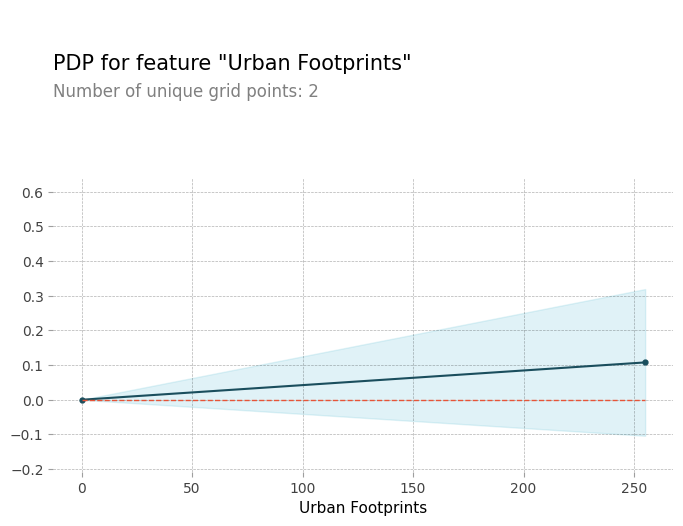

In [54]:
from pdpbox import pdp
pdp_elevation = pdp.pdp_isolate(model=cat_model,                  
                          dataset=data,                              
                          model_features=['Elevation (m)',
                                          'Slope (°)',
                                          'Aspect (°)',
                                          'Surface Roughness',
                                          'Topographic Position Index',
                                          'Terrain Ruggedness Index',
                                          'Terrain Surface Texture',
                                          'Vector Ruggedness Measure',
                                          'Urban Footprints',
                                          'Tree Cover (%)',
                                          'Bare Ground (%)'],
                          feature='Urban Footprints')

#basic aesthetics
plot_params = {
    'title_fontsize': 15,
    'subtitle_fontsize': 12,
    'contour_color':  'white',
    'cmap': 'viridis',
    'inter_fill_alpha': 0.8,
    'inter_fontsize': 9}

fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_elevation,
                        feature_name='Urban Footprints', 
                        center=True, 
                        x_quantile=False, 
                        ncols=2,
                        plot_lines=False, 
                        frac_to_plot=100,
                        plot_params=plot_params, 
                        figsize=(8, 6))

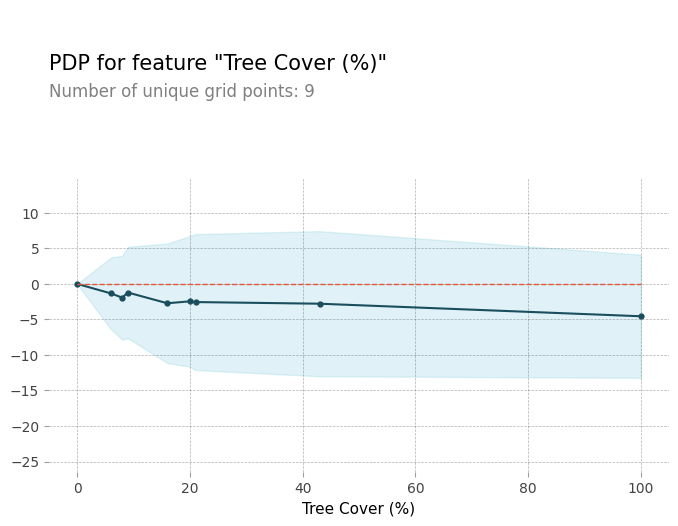

In [55]:
from pdpbox import pdp
pdp_elevation = pdp.pdp_isolate(model=cat_model,                  
                          dataset=data,                              
                          model_features=['Elevation (m)',
                                          'Slope (°)',
                                          'Aspect (°)',
                                          'Surface Roughness',
                                          'Topographic Position Index',
                                          'Terrain Ruggedness Index',
                                          'Terrain Surface Texture',
                                          'Vector Ruggedness Measure',
                                          'Urban Footprints',
                                          'Tree Cover (%)',
                                          'Bare Ground (%)'],
                          feature='Tree Cover (%)')

#basic aesthetics
plot_params = {
    'title_fontsize': 15,
    'subtitle_fontsize': 12,
    'contour_color':  'white',
    'cmap': 'viridis',
    'inter_fill_alpha': 0.8,
    'inter_fontsize': 9}

fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_elevation,
                        feature_name='Tree Cover (%)', 
                        center=True, 
                        x_quantile=False, 
                        ncols=2,
                        plot_lines=False, 
                        frac_to_plot=100,
                        plot_params=plot_params, 
                        figsize=(8, 6))

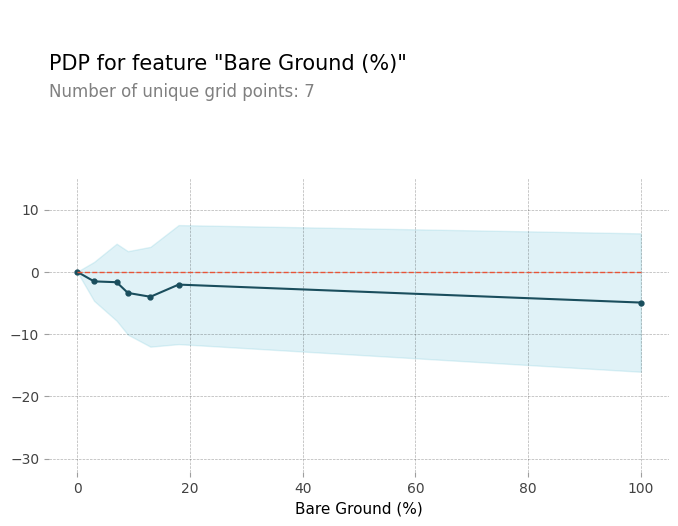

In [56]:
from pdpbox import pdp
pdp_elevation = pdp.pdp_isolate(model=cat_model,                  
                          dataset=data,                              
                          model_features=['Elevation (m)',
                                          'Slope (°)',
                                          'Aspect (°)',
                                          'Surface Roughness',
                                          'Topographic Position Index',
                                          'Terrain Ruggedness Index',
                                          'Terrain Surface Texture',
                                          'Vector Ruggedness Measure',
                                          'Urban Footprints',
                                          'Tree Cover (%)',
                                          'Bare Ground (%)'],
                          feature='Bare Ground (%)')

#basic aesthetics
plot_params = {
    'title_fontsize': 15,
    'subtitle_fontsize': 12,
    'contour_color':  'white',
    'cmap': 'viridis',
    'inter_fill_alpha': 0.8,
    'inter_fontsize': 9}

fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_elevation,
                        feature_name='Bare Ground (%)', 
                        center=True, 
                        x_quantile=False, 
                        ncols=2,
                        plot_lines=False, 
                        frac_to_plot=100,
                        plot_params=plot_params, 
                        figsize=(8, 6))

In [57]:
#SHAP Plots
import shap
explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(X_test)
X_test.columns

Index(['Elevation (m)', 'Slope (°)', 'Aspect (°)', 'Surface Roughness',
       'Topographic Position Index', 'Terrain Ruggedness Index',
       'Terrain Surface Texture', 'Vector Ruggedness Measure',
       'Urban Footprints', 'Tree Cover (%)', 'Bare Ground (%)'],
      dtype='object')

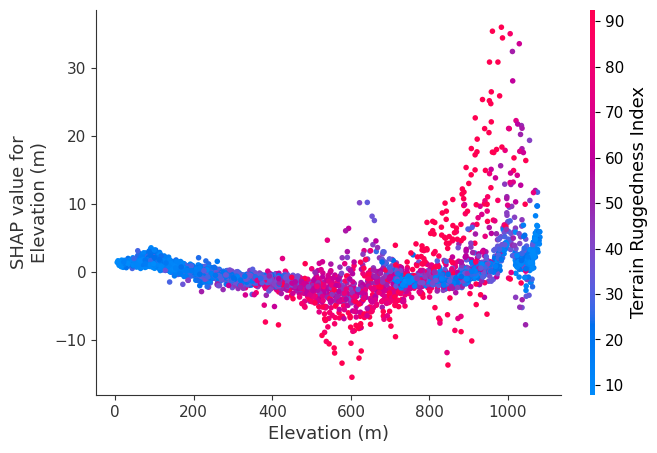

In [58]:
#dependency plots slope
shap.dependence_plot('Elevation (m)', shap_values, X_test)

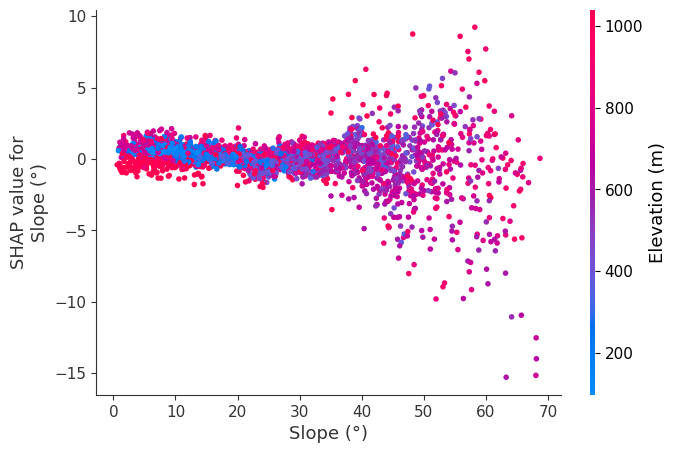

In [59]:
#dependency plots slope
shap.dependence_plot('Slope (°)', shap_values, X_test)

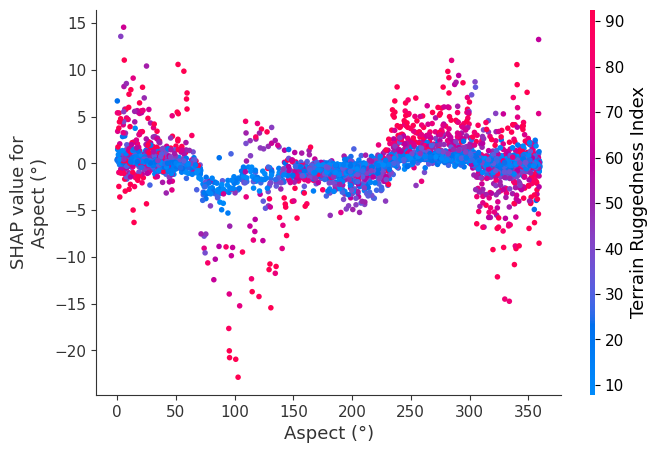

In [60]:
#dependency plots slope
shap.dependence_plot('Aspect (°)', shap_values, X_test)

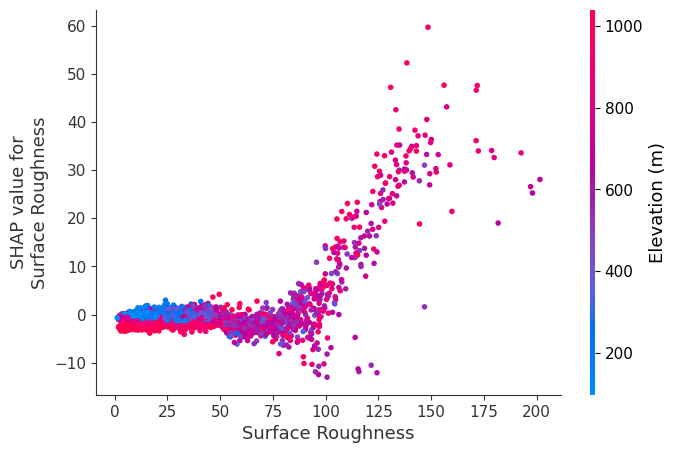

In [61]:
#dependency plots slope
shap.dependence_plot('Surface Roughness', shap_values, X_test)

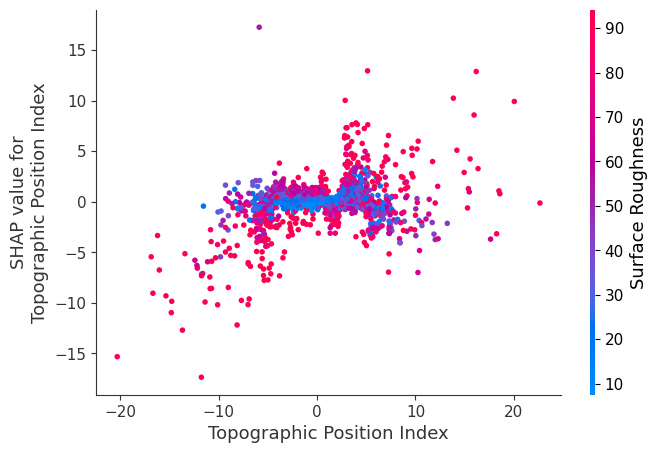

In [62]:
#dependency plots slope
shap.dependence_plot('Topographic Position Index', shap_values, X_test)

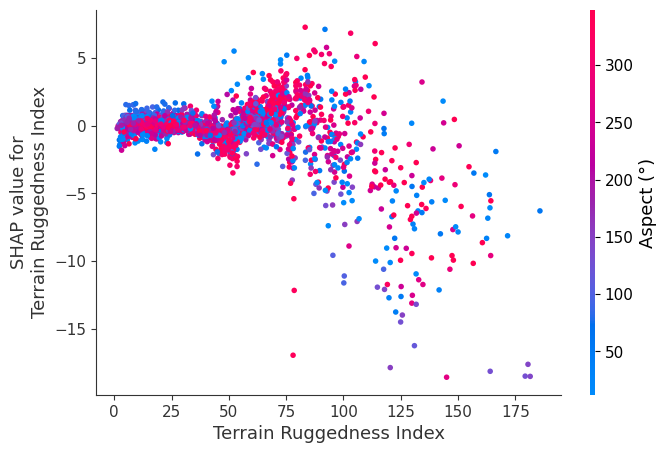

In [63]:
#dependency plots slope
shap.dependence_plot('Terrain Ruggedness Index', shap_values, X_test)

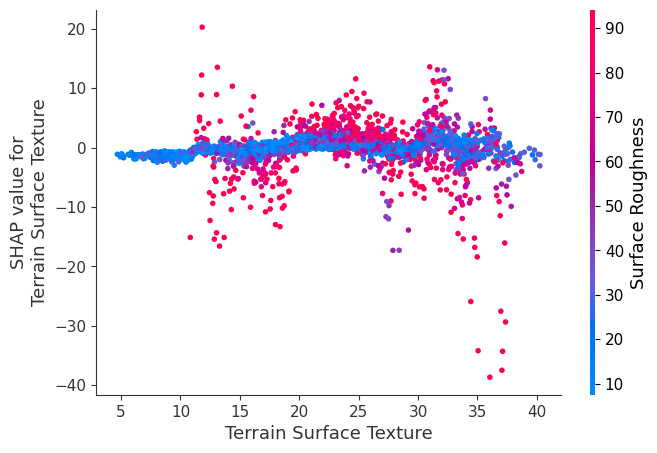

In [64]:
#dependency plots slope
shap.dependence_plot('Terrain Surface Texture', shap_values, X_test)

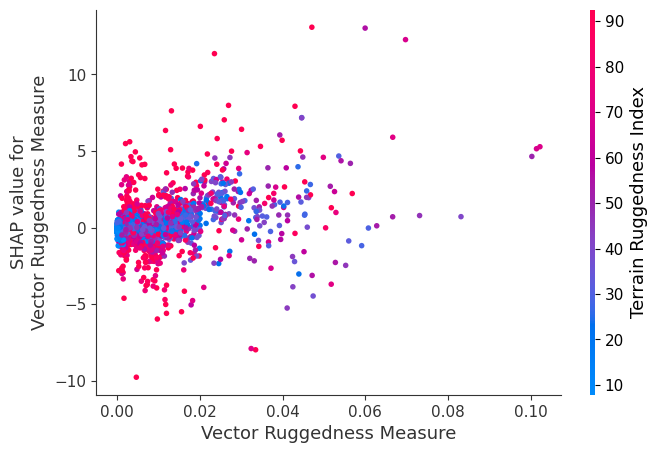

In [65]:
#dependency plots slope
shap.dependence_plot('Vector Ruggedness Measure', shap_values, X_test)

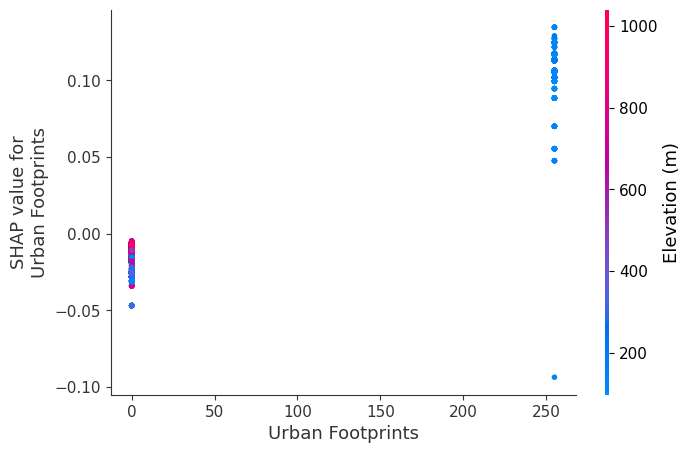

In [66]:
#dependency plots slope
shap.dependence_plot('Urban Footprints', shap_values, X_test)

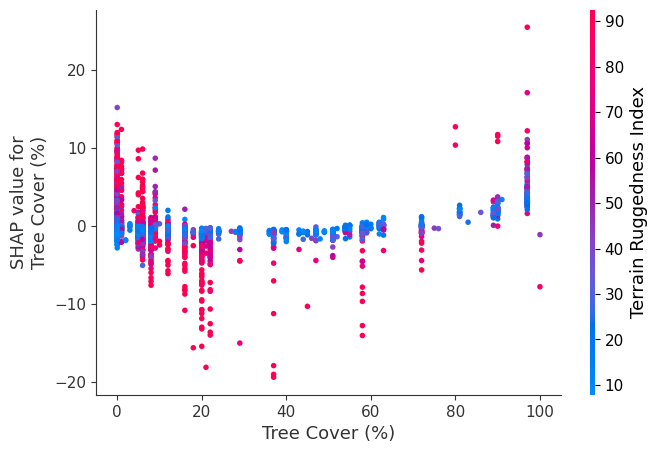

In [67]:
#dependency plots slope
shap.dependence_plot('Tree Cover (%)', shap_values, X_test)

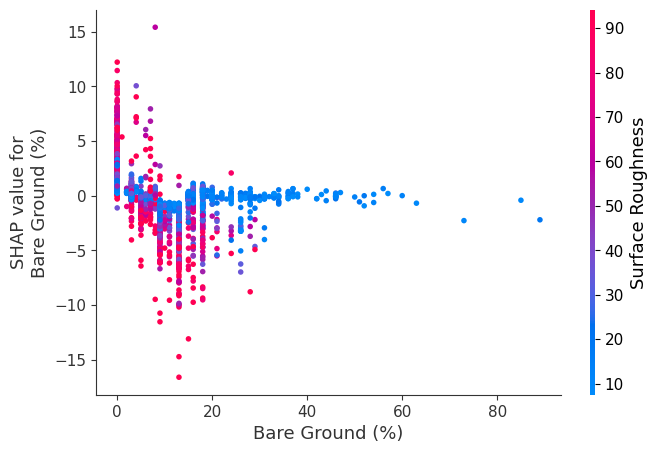

In [68]:
#dependency plots slope
shap.dependence_plot('Bare Ground (%)', shap_values, X_test)

**Save Model**

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [70]:
# save model with joblib
joblib.dump(cat_model, "/content/drive/My Drive/initial_cat_c61.joblib")

['/content/drive/My Drive/initial_cat_c61.joblib']

**SITE B VALIDATION - INITIAL**





In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
Load_initial_cat_c61 = joblib.load("/content/drive/My Drive/initial_cat_c61.joblib")

In [73]:
# Import validation data (Site 2)
from google.colab import files
uploaded = files.upload()

Saving LIDAR_30m_cubic_pts_clean_parameters_egm08_clean_v64_C.csv to LIDAR_30m_cubic_pts_clean_parameters_egm08_clean_v64_C.csv


In [74]:
# specify predictor variables
datab = pd.read_csv("LIDAR_30m_cubic_pts_clean_parameters_egm08_clean_v64_C.csv")
datab = datab.reset_index()
Xb = datab.iloc[:,7:18]
Xb

,Elevation (m),Slope (°),Aspect (°),Surface Roughness,Topographic Position Index,Terrain Ruggedness Index,Terrain Surface Texture,Vector Ruggedness Measure,Urban Footprints,Tree Cover (%),Bare Ground (%)
0,131.483,6.23194,33.4298,8.26112,0.944382,8.47847,28.45800,0.000302,0,97,0
1,469.506,4.94316,196.2520,6.12405,0.831573,6.73541,7.98200,0.000388,0,20,9
2,458.567,4.12977,43.0946,6.75214,0.204010,5.57792,8.26452,0.000091,0,40,5
3,703.209,9.33428,105.2990,12.05940,0.283936,12.03390,15.09630,0.000178,0,12,5
4,457.036,4.48708,41.8963,6.33026,0.659119,5.98647,7.70945,0.000157,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...
22717,699.665,41.10140,300.4670,67.95990,21.490700,89.00930,24.14900,0.084239,0,6,9
22718,723.509,30.99680,95.4972,46.55210,7.479490,50.62210,17.38490,0.047764,0,9,7
22719,480.802,30.57120,57.1717,54.03470,8.553470,54.68380,16.05800,0.080015,0,6,7
22720,488.677,30.85660,59.9999,53.52410,10.953100,57.62270,16.23870,0.081384,0,12,7


In [75]:
# Make a prediction
start_time = time.time()
y_pred1 = Load_initial_cat_c61.predict(Xb)
print("--- %s seconds ---" % (time.time() - start_time))



--- 0.05113625526428223 seconds ---


In [76]:
# append new predictions to csv file
datab["C_h_corrd_64"] = y_pred1
datab.to_csv("/content/drive/My Drive/LIDAR_30m_cubic_pts_clean_parameters_egm08_clean_v64_C_Corr_cat_initial.csv", index = False)